**Module 2**

Download the dataset by clicking this link https://visualize.data.gov.in/?inst=30890ef5-6194-4500-9751-c4e1df1ef76c  X-axis year and  Y-axis (National waterways-I, National Waterways-II, National waterways-III)                    
 Apply Principle component analysis without any library packages of PCA (Use only mathematical library  packages)  and reduce its dimension (Graphical Visualization is Mandatory)


In [ ]:
#Import Necessary Library
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 30890ef5-6194-4500-9751-c4e1df1ef76c.csv to 30890ef5-6194-4500-9751-c4e1df1ef76c (1).csv


In [ ]:
df=pd.read_csv("30890ef5-6194-4500-9751-c4e1df1ef76c.csv")
df

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603
5,2008-09,7068,142,109,7319
6,2009-10,10402,74,97,10573
7,2010-11,12302,573,142,13017
8,2011-12,14546,613,132,15291
9,2012-13,15119,580,139,15838


In [ ]:
#Extract data for PCA
matrix = df[['National Waterways- I',	'National Waterways- II',	'National Waterways-III']].to_numpy()
matrix

array([[ 1596,   296,   219],
       [ 3119,   381,   154],
       [ 4109,   322,   169],
       [ 5803,  1728,   149],
       [ 7092,   422,    89],
       [ 7068,   142,   109],
       [10402,    74,    97],
       [12302,   573,   142],
       [14546,   613,   132],
       [15119,   580,   139],
       [18512,   594,   116]])

In [ ]:
#Standardize the data
X_mean=np.mean(matrix,axis=0)
print("Mean of each column",X_mean)

X_std=np.std(matrix,axis=0)
print("\nStd of each column",X_std)

K=(matrix-X_mean) / X_std
print("\nStandardized Matrix\n",K)

Mean of each column [9060.72727273  520.45454545  137.72727273]

Std of each column [5243.41854295  419.94596268   34.84795784]

Standardized Matrix
 [[-1.4236375  -0.53448435  2.33220918]
 [-1.13317814 -0.33207736  0.46696358]
 [-0.94437002 -0.47257162  0.89740488]
 [-0.62129835  2.87547818  0.32348315]
 [-0.37546636 -0.23444575 -1.39828202]
 [-0.38004353 -0.9011982  -0.82436029]
 [ 0.25580119 -1.06312379 -1.16871333]
 [ 0.61816021  0.12512432  0.12261055]
 [ 1.04612529  0.22037467 -0.16435031]
 [ 1.15540514  0.14179313  0.03652229]
 [ 1.80250206  0.17513076 -0.62348769]]


**Creating Covariance Matrix**

In [ ]:
cov_matrix=np.cov(K.T)
print("Covariance Matrix is \n",cov_matrix)

Covariance Matrix is 
 [[ 1.1         0.07429286 -0.55362707]
 [ 0.07429286  1.1         0.12928132]
 [-0.55362707  0.12928132  1.1       ]]


**Calculating Eigen Value and Eigen Vector**

In [ ]:
from numpy.linalg import eig
e,v=np.linalg.eig(cov_matrix)
print("Eigen Value is \n",e)
print("\nEigen Vector is \n",v)

Eigen Value is 
 [0.51110696 1.65643842 1.13245463]

Eigen Vector is 
 [[ 0.68104775 -0.69862258  0.21931815]
 [-0.23794521  0.07211197  0.96859793]
 [ 0.69249984  0.71184714  0.1171222 ]]


**Sort Eigen Value and Eigen Vector in decending Order**

In [ ]:
sorted_index = np.argsort(e)[::-1]
sorted_eigenvalues = e[sorted_index]
print("\nSorted Eigen Value is \n",sorted_eigenvalues)
sorted_eigenvectors = v[:, sorted_index]
print("\nSorted Eigen Vector is \n",sorted_eigenvectors)


Sorted Eigen Value is 
 [1.65643842 1.13245463 0.51110696]

Sorted Eigen Vector is 
 [[-0.69862258  0.21931815  0.68104775]
 [ 0.07211197  0.96859793 -0.23794521]
 [ 0.71184714  0.1171222   0.69249984]]


**Select Principal Component**

In [ ]:
#Select top "n" eigen value
n=2
eigenvector_subset=sorted_eigenvectors[:, :n]
print(eigenvector_subset)

[[-0.69862258  0.21931815]
 [ 0.07211197  0.96859793]
 [ 0.71184714  0.1171222 ]]


**Transform the data**

In [ ]:
Z = np.dot(K,eigenvector_subset)

print(f"Shape of Reduced Dataset is : {Z.shape}\n And Reduced Dataset is \n {Z}")


Shape of Reduced Dataset is : (11, 2)
 And Reduced Dataset is 
 [[ 2.61621903 -0.55677651]
 [ 1.10012377 -0.51548417]
 [ 1.26449524 -0.55974335]
 [ 0.87168002  2.68680726]
 [-0.74996013 -0.47320011]
 [-0.38629871 -1.05280004]
 [-1.08731769 -1.11051993]
 [-0.33555775  0.27112933]
 [-0.83194739  0.42363964]
 [-0.77096884  0.39501942]
 [-1.69046754  0.49192845]]


**Graphical Visualization**

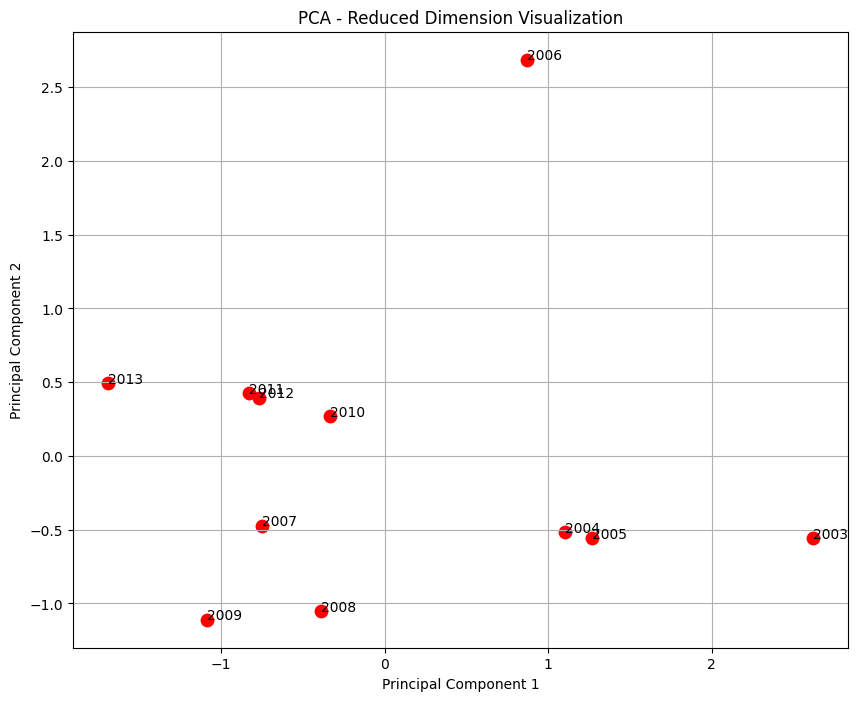

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(Z[: ,0], Z[: ,1], color='red' , marker='o', s=80)

for i ,year in enumerate(range(2003,2014)):
  plt.text(Z[i,0], Z[i,1],str(year))


plt.title('PCA - Reduced Dimension Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()